In [6]:
import pandas as pd
from pandas_datareader.yahoo import daily as yh
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
ticker = 'UPS'
price = pd.DataFrame()
start_date = '2017-1-1'

# m = month, d = day, w = week for interval.
price = yh.YahooDailyReader(ticker, start = start_date, interval = 'm')
price = price.read()['Adj Close']
price.head()

Date
2017-01-01    93.160713
2017-02-01    90.283867
2017-03-01    92.301224
2017-04-01    92.438858
2017-05-01    91.157127
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

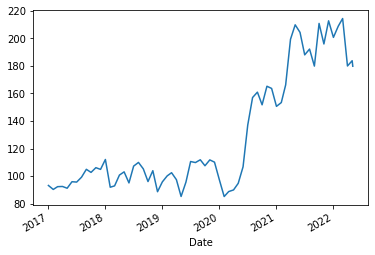

In [8]:
# path_name = 'results/' + ticker + start_date +'.csv'
# price.to_csv(path_name)
price.plot()

<AxesSubplot:xlabel='Date'>

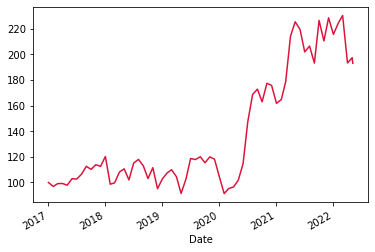

In [9]:
(price / price.iloc[0] * 100).plot(c = '#dc143c') 

In [10]:
contribution = sum(price)
value = len(price) * price[-1]

ret = value/contribution - 1

print(f'If buying 1 share of {ticker} every month since {start_date}, the results are:')
print(f"Total contribution: ${contribution :.2f} ; Current value: ${value :.2f} ; Total return: {ret*100 :.2f}%")

If buying 1 share of UPS every month since 2017-1-1, the results are:
Total contribution: $8542.79 ; Current value: $11866.14 ; Total return: 38.90%


In [11]:
# dividend analysis

dividends = pd.DataFrame()

dividends = wb.DataReader(ticker,data_source = 'yahoo-dividends',start = start_date,) #use yahoo-actions see split.
dividends.head()

,action,value
2022-02-18,DIVIDEND,1.52
2021-11-19,DIVIDEND,1.02
2021-08-20,DIVIDEND,1.02
2021-05-21,DIVIDEND,1.02
2021-02-19,DIVIDEND,1.02


In [12]:
dividends.tail()

,action,value
2018-02-16,DIVIDEND,0.91
2017-11-10,DIVIDEND,0.83
2017-08-10,DIVIDEND,0.83
2017-05-11,DIVIDEND,0.83
2017-02-16,DIVIDEND,0.83


<AxesSubplot:>

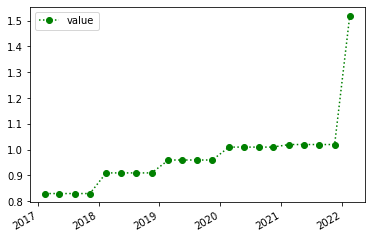

In [13]:
dividends.plot(c = 'g',marker='o', ls = ':') #ls or linestyle.